# total population and hk recycling volume per capita

Model Summary:
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.5931      0.385      6.736      0.000       1.784       3.402
HK total population (mid-year) -3.154e-07   5.35e-08     -5.900      0.000   -4.28e-07   -2.03e-07

R-squared: 0.6591


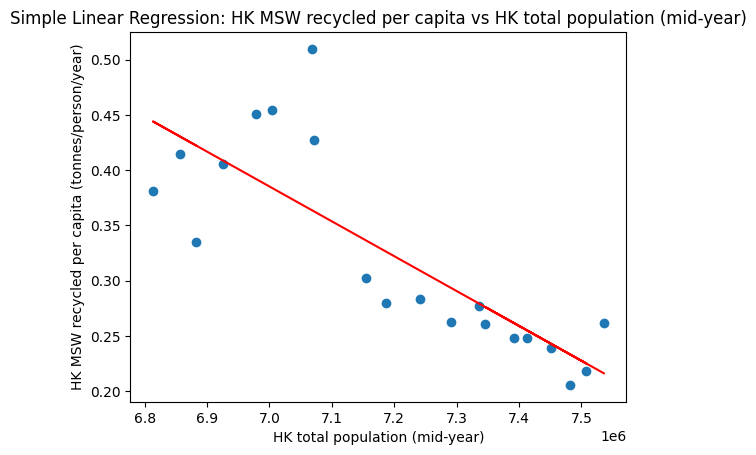

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per capita vs HK total population (mid-year)

# Prepare data
df['HK total population (mid-year)'] = pd.to_numeric(
    df['HK total population (mid-year)'], errors='coerce'
)
df['HK total MSW recycled (tonnes)'] = pd.to_numeric(
    df['HK total MSW recycled (tonnes)'], errors='coerce'
)

# Calculate yearly MSW recycled per capita (tonnes per person per year)
df['HK MSW recycled per capita (tonnes/person/year)'] = (
    df['HK total MSW recycled (tonnes)'] / df['HK total population (mid-year)']
)

# Prepare data
X2 = df[['HK total population (mid-year)',
         'HK MSW recycled per capita (tonnes/person/year)']].dropna()
y = X2['HK MSW recycled per capita (tonnes/person/year)']
X2 = X2[['HK total population (mid-year)']]

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('HK total population (mid-year)')
plt.ylabel('HK MSW recycled per capita (tonnes/person/year)')
plt.title('Simple Linear Regression: HK MSW recycled per capita vs HK total population (mid-year)')
plt.show()


**Population coefficient ($\hat \beta_1$) ≈ −3.15 × 10^{-7} (p ≈ 0.00001 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong’s total population and the **MSW recycled per capita per year**. As the total population increases, the amount of waste recycled **per person** tends to **decrease slightly**, suggesting that recycling performance per person has weakened as the city's population has grown.  

- The **R-squared is around 0.66**, meaning total population explains **about two-thirds of the variation** in per-capita recycling volume; the remaining variation is likely driven by other factors such as recycling policies, economic conditions, market demand for recyclables, and residents’ recycling behaviour.
